#### 인공 신경망으로 y = 𝑥𝑥3 식으로 표현되는 3차식을 학습할 수 있는 인공 신경망(artificial neural network) 모델을 설계하고 아래 물음에 답하세요. 단, 특성의 개수가 1 -> 50 -> 100 -> 1개로 변하는 인공신경망을 사용하고, 함수를 표현하는 점들은 아래의 파이썬 또는 파이토치 코드로 생성하세요.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

In [6]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x+noise)**3
y_noise = y + noise

<br/>

① 2차원 평면에 x, y 포인트들을 가시화 해보세요.

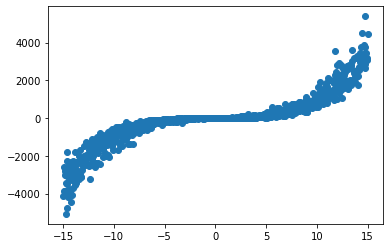

In [7]:
plt.scatter(x, y)
plt.show()

<br/>

② 특성의 개수가 1 -> 50 -> 100 -> 1개로 변하는 완전연결 신경망(fully connected neural network) 모델을 설계하고 학습 모델의 구성과 각 계층별 요약과 파라미터 수를 출력해 보세요.

In [22]:
# 아래 코드는 특성의 개수가 1 -> 50 -> 100 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

model = nn.Sequential(
          nn.Linear(1,50),
          nn.ReLU(),
          nn.Linear(50,100),
          nn.ReLU(),
          nn.Linear(100,1),
      )

In [23]:
# gpu가 사용 가능한 경우에는 device를 0번 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델 자녀 노드의 이름과 모듈을 출력합니다.
for i in model.named_children():
    print(i)

cuda:0
('0', Linear(in_features=1, out_features=50, bias=True))
('1', ReLU())
('2', Linear(in_features=50, out_features=100, bias=True))
('3', ReLU())
('4', Linear(in_features=100, out_features=1, bias=True))


<br/>

③ 에포크 10000, 학습률 0.0002로 설정하고 에포크별 MAE(mean absolute error) 손실을 평가하여 그래프로 그려보세요.

In [24]:
num_epoch = 10000
lr = 0.0002

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

In [25]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

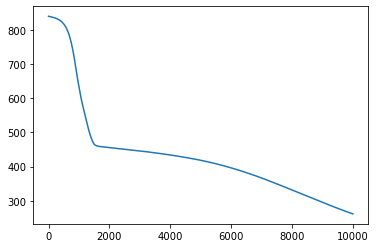

In [26]:
plt.plot(loss_array)
plt.show()

<br/>

#### (추가) 학습된 모델의 결과값과 실제 목표값의 비교

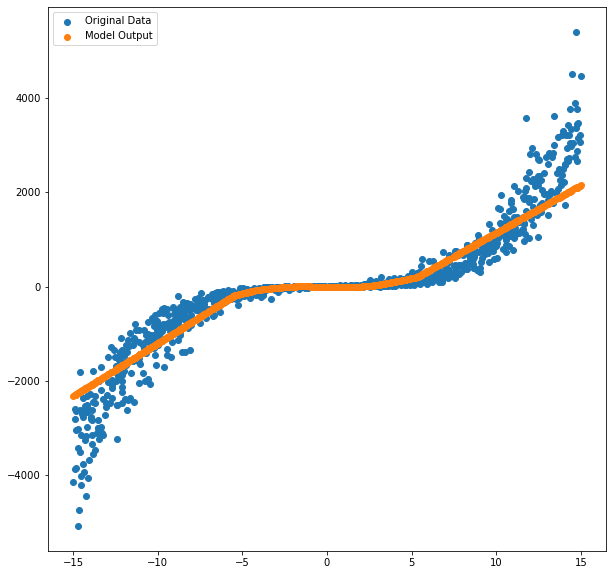

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()

<br/>

④ 손실함수로 MSE(mean squared error)를 사용해도 성능이 잘 나오도록 튜닝해 보세요.

- 최적화 함수로 Adam을 사용하면 상당히 개선됨

손실함수 주소: https://pytorch.org/docs/stable/nn.html  <br/>
최적화함수 주소: https://pytorch.org/docs/stable/optim.html

In [83]:
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x+noise)**3
y_noise = y + noise

In [84]:
# 아래 코드는 특성의 개수가 1 -> 50 -> 100 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6, 10),
    nn.ReLU(),
    nn.Linear(10, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [85]:
num_epoch = 20000
lr = 0.002

loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.0002)

In [86]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

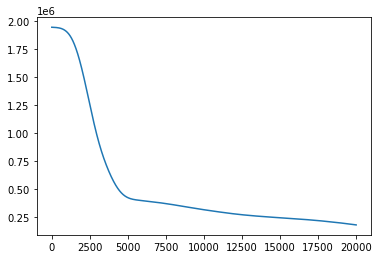

In [87]:
plt.plot(loss_array)
plt.show()

<br/>

#### (추가) 학습된 모델의 결과값과 실제 목표값의 비교

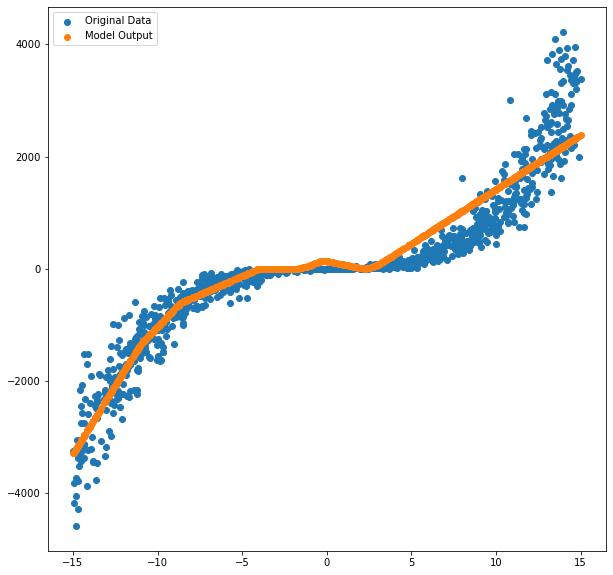

In [88]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()